In [18]:
import cv2
import numpy as np
from scipy.signal import wiener
import matplotlib.pyplot as plt

In [19]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    salt_mask = np.random.rand(*image.shape) < salt_prob
    pepper_mask = np.random.rand(*image.shape) < pepper_prob
    noisy_image[salt_mask] = 255
    noisy_image[pepper_mask] = 0
    return noisy_image

def wiener_filter(noisy_image, kernel_size, noise_variance):
    return wiener(noisy_image, (kernel_size, kernel_size))

def median_filter(noisy_image, kernel_size):
    return cv2.medianBlur(noisy_image.astype(np.uint8), kernel_size)

In [20]:
image = cv2.imread('blob(2).jpg', cv2.IMREAD_GRAYSCALE)

In [21]:
salt_prob = 0.01
pepper_prob = 0.01
noisy_image = add_salt_and_pepper_noise(image, salt_prob, pepper_prob)


kernel_size = 4
noise_variance = 0.001
restored_wiener = wiener_filter(noisy_image.astype(np.float32), kernel_size, noise_variance)


median_kernel_size = 3
restored_median = median_filter(noisy_image, median_kernel_size)

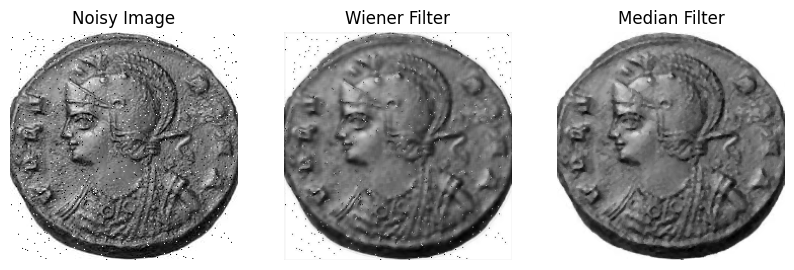

In [22]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(restored_wiener, cmap='gray')
plt.title('Wiener Filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(restored_median, cmap='gray')
plt.title('Median Filter')
plt.axis('off')

plt.show()